# "VAE颗粒" 与 "GAN颗粒" 的特征比较

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
sns.set(font_scale=1.3)
sns.set_style({"font.family": "Monospace"})

from particle.utils.plotter import Violin

## 颗粒几何特征
- volume 体积
- surface 表面积
- radius 等效球半径
- sphericity 球度
- EI, FI 伸长率、扁平率
- convexity 凸度
- angularity 棱角度
- roughness 粗糙度

In [2]:
raw = np.load('output/geometry/trainSet.npz')
vae = np.load('output/vae/nLatent64/geometry/vae.npz')
gan = np.load('output/geometry/gan-29.npz')
# test = np.load('output/geometry/test.npz')

print(raw['surface'].shape, vae['surface'].shape, gan['surface'].shape)

violin = Violin((raw, vae, gan), ('raw', 'vae', 'gan'))

(27107,) (2999,) (2998,)


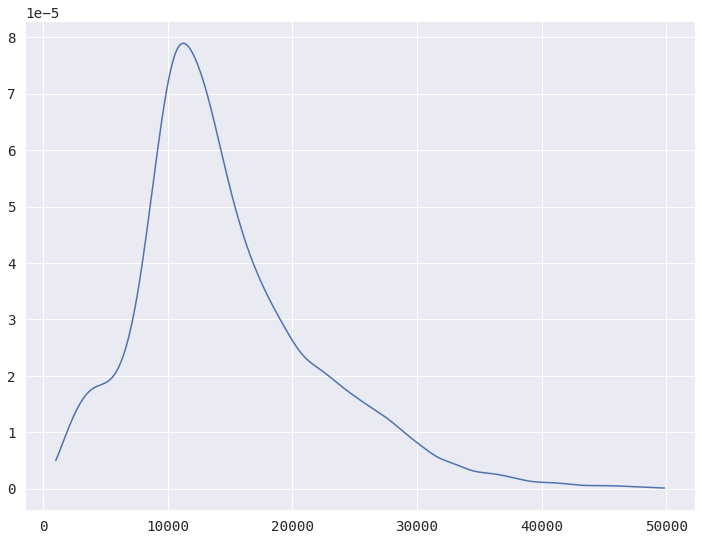

In [3]:
from scipy.stats import gaussian_kde
volume = raw['volume']
volume.sort()
kernel = gaussian_kde(volume)
xPlot = np.linspace(volume.min(), volume.max(), 1000)
dsty = kernel.pdf(xPlot)
plt.figure(figsize=(12, 9))
plt.plot(xPlot, dsty)

In [4]:
np.sum(dsty*(volume.max()-volume.min())/1000)

0.9956162582237446

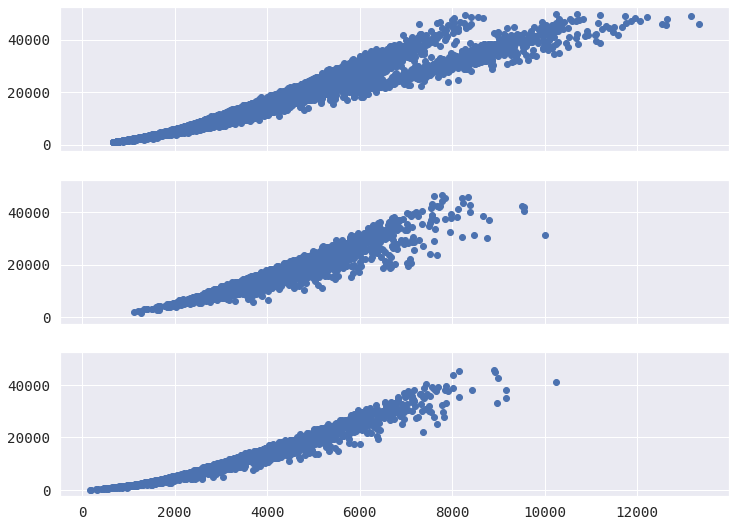

In [5]:
fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(12,9))
ax[0].plot(raw['surface'], raw['volume'], 'o')
ax[1].plot(vae['surface'], vae['volume'], 'o')
ax[2].plot(gan['surface'], gan['volume'], 'o')
# ax[3].plot(test['surface'], test['volume'], 'o')

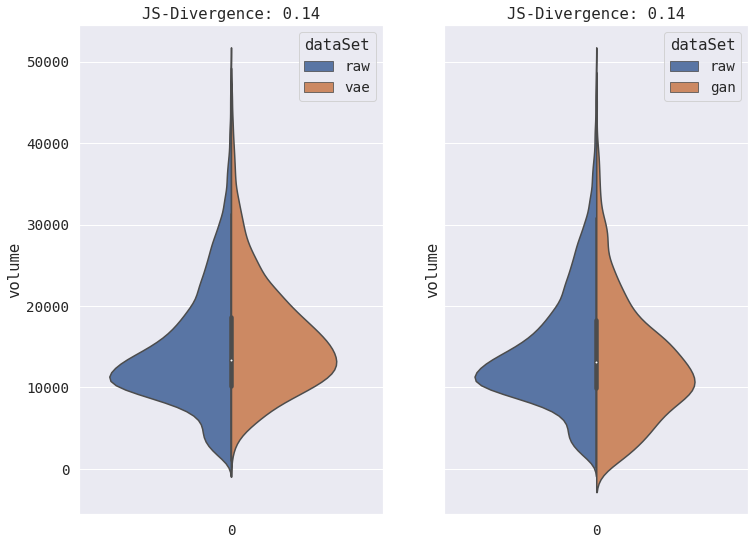

In [6]:
violin.plot(feature='volume', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

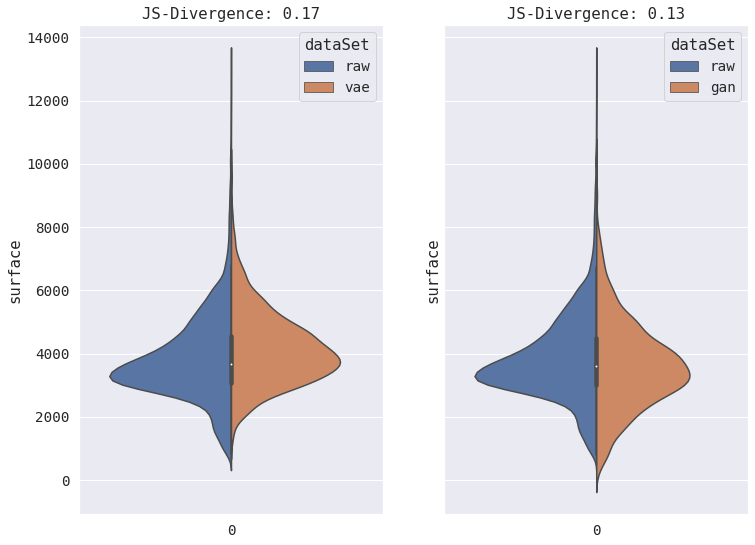

In [7]:
violin.plot(feature='surface', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

## 以下为形状参数

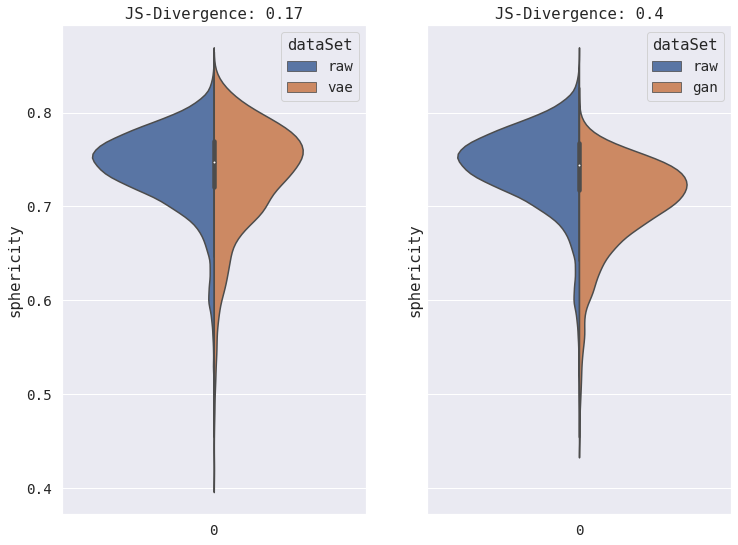

In [8]:
violin.plot(feature='sphericity', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

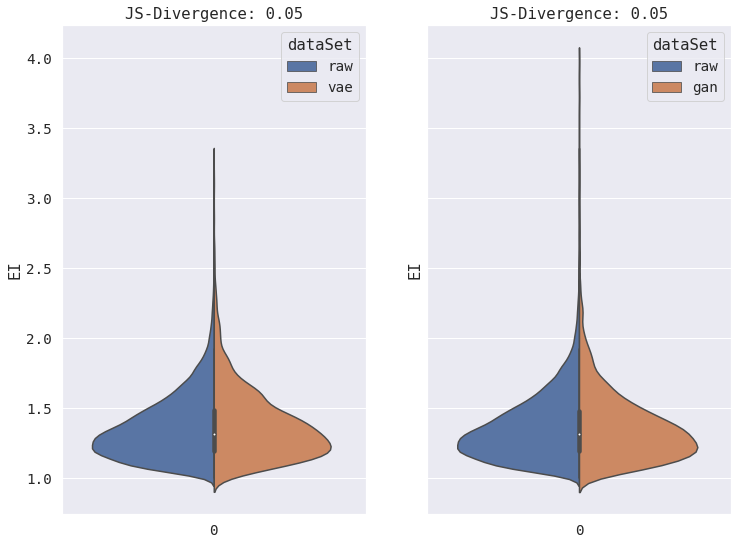

In [9]:
violin.plot(feature='EI', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

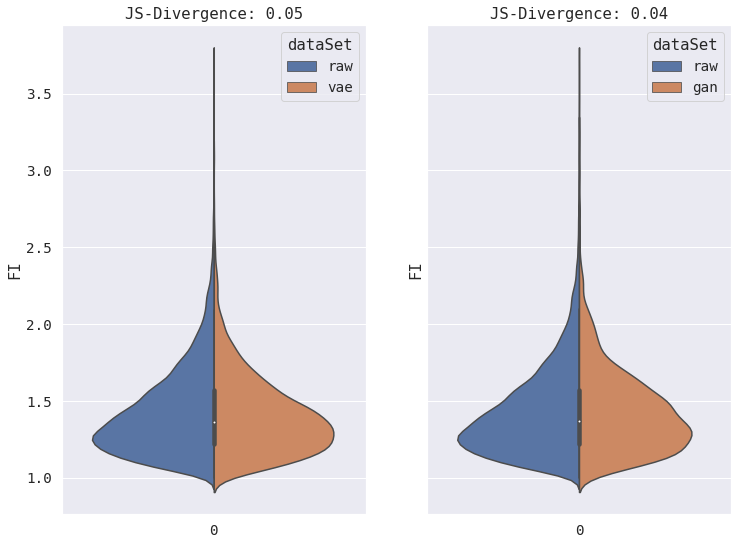

In [10]:
violin.plot(feature='FI', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

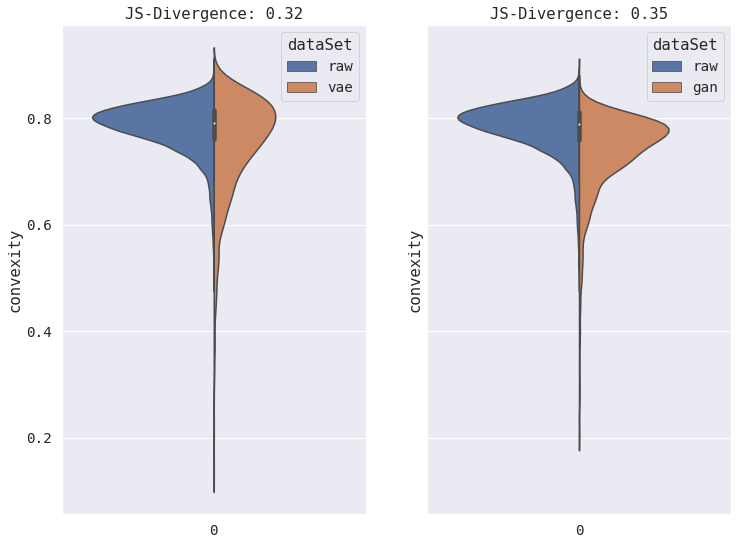

In [11]:
violin.plot(feature='convexity', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

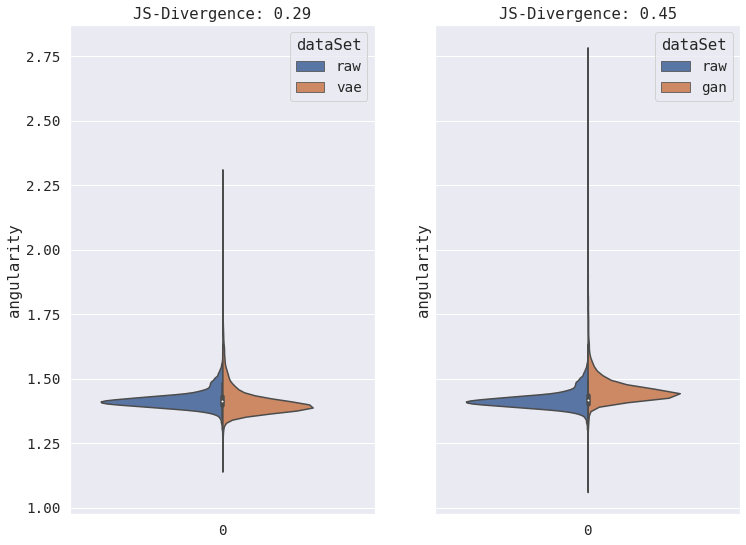

In [12]:
violin.plot(feature='angularity', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

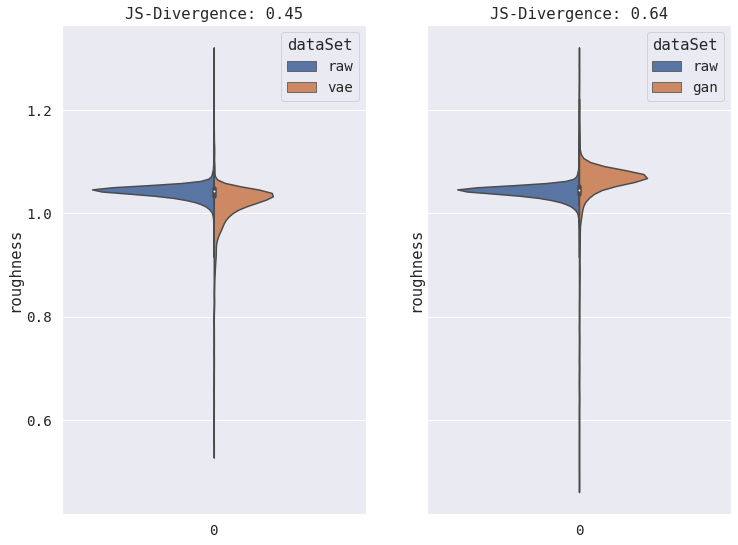

In [13]:
violin.plot(feature='roughness', setName=('vae', 'gan', 'raw'), figsize=(12, 9));

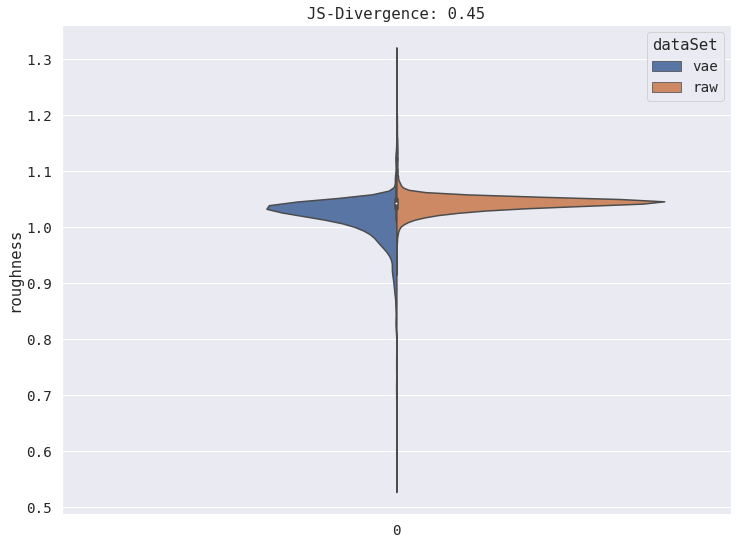

In [14]:
violin.plot(feature='roughness', setName=('vae', 'raw'), figsize=(12, 9));